### Project Name : Employee Performance Analysis INX Future Inc.
####  QNO.1. A trained model which can predict the employee performance based on factors as inputs.

### Data Pre-processing :

### Step-1 : Importing the necessary Libraries  

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Step-2 : Importing the Data set

In [2]:
Data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [3]:
#2.1 Displaying the shape to know the status of the dataset:
Data.shape

(1200, 28)

In [4]:
Data.size

33600

In [5]:
#2.2 Displaying the entire data of the header names(column names) with top of the  records from the given dataset file.

Data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [6]:
#2.3 Displaying the entire data of the header names(column names) with bottom of the  records from the given dataset file.
Data.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [7]:
#2.4 Display the full information of the data with the data types, and their summary of the records : 

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### Step-3 : Handiling the Missing data

In [8]:
# 3.1. Check for missing values ot be findout the Nan values or missing values:
#      1. Displaying the Nan values from the entire dataset, and displaying their summary of the individual columns.      
Data.isnull().sum() 

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [9]:
##3.2. Summary of the total Nan values :
Data.isnull().sum().sum()

0

<Axes: >

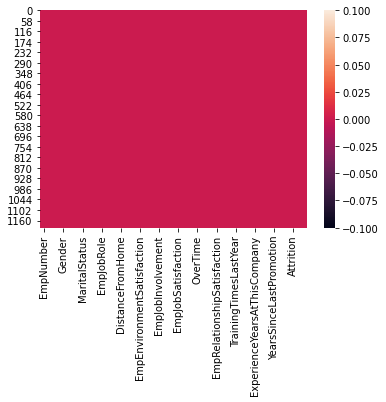

In [10]:
## 3.3 . Visualizing the missing values
sns.heatmap(Data.isnull())

#### 3.4 checking Special characters :

In [11]:
#1.Displaying entire dataset again to be check special characters in that data.
Data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [12]:
# Filling the special characters with the NaN.
Data.replace(['$','*','?','-'],np.nan,inplace=True)

In [13]:
# Displaying  the entire dataset to be check particular special character place, either its 
# changed to as per the NaN.
Data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [14]:
# Cheking the  Nan values of status again after filled the cpecial characters
Data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [15]:
Data.isnull().sum().sum()

0

#### 3.5. Dealing with the Nan values (missng values):

In [16]:
# Displaying  the entire dataset to be check particular Nan values place, either its 
# changed or not.
Data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [17]:
# Cheking the  Nan values of status again after filled the all Nan values
Data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [18]:
Data.isnull().sum().sum()

0

#### 3.6. Checking Duplicates exist in the dataset :

In [19]:
# It is recommended to check for duplicates right after dealing with NaN values
Data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [20]:
Data.duplicated()                  #checks for duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Length: 1200, dtype: bool

In [21]:
Data[Data.duplicated()]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [22]:
Data.duplicated().sum()

0

In [23]:
Data.duplicated().value_counts()

False    1200
dtype: int64

In [24]:
Data.shape    # Orgianl records = 1200, after duplication = 1200

(1200, 28)

In [25]:
Data.duplicated().sum()

0

In [26]:
# Dropping the first columns as it is of no use for analysis.
#Data.drop(['EmpNumber'],inplace=True,axis=1)

In [27]:
Data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [28]:
Neo4jDB = Data
Neo4jDB

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [29]:
Neo4jDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [30]:
# Seperating Target values to be show graph
GRAPHDB = Neo4jDB.iloc[:,[0,5,6,10,17,21,22,23,24,25,27]]
GRAPHDB

EmpNumber    EmpDepartment        EmpJobRole  EmpEnvironmentSatisfaction  \
0     E1001000            Sales   Sales Executive                           4   
1     E1001006            Sales   Sales Executive                           4   
2     E1001007            Sales   Sales Executive                           4   
3     E1001009  Human Resources           Manager                           2   
4     E1001010            Sales   Sales Executive                           1   
...        ...              ...               ...                         ...   
1195   E100992            Sales   Sales Executive                           4   
1196   E100993      Development  Senior Developer                           4   
1197   E100994      Development  Senior Developer                           4   
1198   E100995     Data Science    Data Scientist                           4   
1199   E100998            Sales   Sales Executive                           1   

      EmpLastSalaryHikePercent  EmpWorkLifeBalance  \
0                           12                   2   
1                           12                   3   
2                           21                   3   
3                           15                   2   
4                           14                   3   
...                        ...                 ...   
1195                        20                   3   
1196                        17                   3   
1197                        11                   3   
1198                        14                   4   
1199                        14                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

      YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
0                           0                     8                  3  
1                           1                     7                  3  
2                           1                    12                  4  
3                          12                     6                  3  
4                           2                     2                  3  
...                       ...                   ...                ...  
1195                        0                     4                  4  
1196                        0                     0                  3  
1197                        3                     8                  3  
1198                        7                     7                  3  
1199                        2                     0                  2  

[1200 rows x 11 columns]

In [31]:
# Save the DataFrame to a CSV file
GRAPHDB.to_csv('GRAPHDB.csv', index=False)

### Step-4. Encoding  Categorical Data  :

In [32]:
# The following command allows the dataset to be examined for categorical value:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [33]:
Data.dtypes.value_counts()

int64     19
object     9
dtype: int64

In [34]:
#Using the LabelEncoding to  converting categorical data(dtypes of objects) into 
#numerical data(dtyps of integers).
#syntax : data.categorical_data = encoder.fit_transform(data.categorical_data
encoder = LabelEncoder()

In [35]:
#Data.EmpNumber = encoder.fit_transform(Data.EmpNumber)
Data.Gender  = encoder.fit_transform(Data.Gender)
Data.EducationBackground  = encoder.fit_transform(Data.EducationBackground )
Data.MaritalStatus = encoder.fit_transform(Data.MaritalStatus)
Data.EmpDepartment = encoder.fit_transform(Data.EmpDepartment)
Data.EmpJobRole = encoder.fit_transform(Data.EmpJobRole)
Data.BusinessTravelFrequency = encoder.fit_transform(Data.BusinessTravelFrequency)
Data.OverTime  = encoder.fit_transform(Data.OverTime )
Data.Attrition  = encoder.fit_transform(Data.Attrition )

In [36]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   int32 
 3   EducationBackground           1200 non-null   int32 
 4   MaritalStatus                 1200 non-null   int32 
 5   EmpDepartment                 1200 non-null   int32 
 6   EmpJobRole                    1200 non-null   int32 
 7   BusinessTravelFrequency       1200 non-null   int32 
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### Pre-processed Data :

In [37]:
# Checking the final pre-processed Data :
Data.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    0              0              3   
4  E1001010   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3  

[5 rows x 28 columns]

#### Data Describing & checking Correlation to  Select the Target fields 

In [38]:
Data.describe()  # It is only to calculate the data types of integers & floats only

Age       Gender  EducationBackground  MaritalStatus  \
count  1200.000000  1200.000000           1200.00000    1200.000000   
mean     36.918333     0.604167              2.23500       1.096667   
std       9.087289     0.489233              1.31004       0.731050   
min      18.000000     0.000000              0.00000       0.000000   
25%      30.000000     0.000000              1.00000       1.000000   
50%      36.000000     1.000000              2.00000       1.000000   
75%      43.000000     1.000000              3.00000       2.000000   
max      60.000000     1.000000              5.00000       2.000000   

       EmpDepartment   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
count    1200.000000  1200.000000              1200.000000       1200.000000   
mean        3.215000     9.039167                 1.595000          9.165833   
std         1.696911     4.754451                 0.679234          8.176636   
min         0.000000     0.000000                 0.000000          1.000000   
25%         1.000000     4.000000                 1.000000          2.000000   
50%         4.000000     9.000000                 2.000000          7.000000   
75%         5.000000    13.000000                 2.000000         14.000000   
max         5.000000    18.000000                 2.000000         29.000000   

       EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
count         1200.00000                 1200.000000  ...   
mean             2.89250                    2.715833  ...   
std              1.04412                    1.090599  ...   
min              1.00000                    1.000000  ...   
25%              2.00000                    2.000000  ...   
50%              3.00000                    3.000000  ...   
75%              4.00000                    4.000000  ...   
max              5.00000                    4.000000  ...   

       EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
count                  1200.000000                 1200.000000   
mean                      2.725000                   11.330000   
std                       1.075642                    7.797228   
min                       1.000000                    0.000000   
25%                       2.000000                    6.000000   
50%                       3.000000                   10.000000   
75%                       4.000000                   15.000000   
max                       4.000000                   40.000000   

       TrainingTimesLastYear  EmpWorkLifeBalance  \
count            1200.000000         1200.000000   
mean                2.785833            2.744167   
std                 1.263446            0.699374   
min                 0.000000            1.000000   
25%                 2.000000            2.000000   
50%                 3.000000            3.000000   
75%                 3.000000            3.000000   
max                 6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager    Attrition  \
count              1200.000000           1200.000000  1200.000000   
mean                  2.194167              4.105000     0.148333   
std                   3.221560              3.541576     0.355578   
min                   0.000000              0.000000     0.000000   
25%                   0.000000              2.000000     0.000000   
50% 

In [39]:
Data.corr()

Age    Gender  EducationBackground  \
Age                           1.000000 -0.040107            -0.055905   
Gender                       -0.040107  1.000000             0.009922   
EducationBackground          -0.055905  0.009922             1.000000   
MaritalStatus                -0.098368 -0.042169            -0.001097   
EmpDepartment                -0.000104 -0.010925            -0.026874   
EmpJobRole                   -0.037665  0.011332            -0.012325   
BusinessTravelFrequency       0.040579 -0.043608             0.012382   
DistanceFromHome              0.020937 -0.001507            -0.013919   
EmpEducationLevel             0.207313 -0.022960            -0.047978   
EmpEnvironmentSatisfaction    0.013814  0.000033             0.045028   
EmpHourlyRate                 0.062867  0.002218            -0.030234   
EmpJobInvolvement             0.027216  0.010949            -0.025505   
EmpJobLevel                   0.509139 -0.050685            -0.056338   
EmpJobSatisfaction           -0.002436  0.024680            -0.030977   
NumCompaniesWorked            0.284408 -0.036675            -0.032879   
OverTime                      0.051910 -0.038410             0.007046   
EmpLastSalaryHikePercent     -0.006105 -0.005319            -0.009788   
EmpRelationshipSatisfaction   0.049749  0.030707             0.005652   
TotalWorkExperienceInYears    0.680886 -0.061055            -0.027929   
TrainingTimesLastYear        -0.016053 -0.057654             0.051596   
EmpWorkLifeBalance           -0.019563  0.015793             0.022890   
ExperienceYearsAtThisCompany  0.318852 -0.030392            -0.009887   
ExperienceYearsInCurrentRole  0.217163 -0.031823            -0.003215   
YearsSinceLastPromotion       0.228199 -0.021575             0.014277   
YearsWithCurrManager          0.205098 -0.036643             0.002767   
Attrition                    -0.189317  0.035758             0.027161   
PerformanceRating            -0.040164 -0.001780             0.005607   

                              MaritalStatus  EmpDepartment  EmpJobRole  \
Age                               -0.098368      -0.000104   -0.037665   
Gender                            -0.042169      -0.010925    0.011332   
EducationBackground               -0.001097      -0.026874   -0.012325   
MaritalStatus                      1.000000       0.067272    0.038023   
EmpDepartment                      0.067272       1.000000    0.568973   
EmpJobRole                         0.038023       0.568973    1.000000   
BusinessTravelFrequency            0.028520      -0.045233   -0.086251   
DistanceFromHome                  -0.019148       0.007707    0.022939   
EmpEducationLevel                  0.026737       0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.032467      -0.019237    0.044612   
EmpHourlyRate                     -0.013540       0.003957   -0.016179   
EmpJobInvolvement                 -0.043355      -0.076988   -0.008034   
EmpJobLevel                       -0.087359       0.100526    0.004406   
EmpJobSatisfaction                 0.044593       0.007150    0.032916   
NumCompaniesWorked                -0.030095      -0.033950   -0.009111   
OverTime                          -0.022833      -0.026841    0.015075   
EmpLastSalaryHikePercent           0.010128      -0.012661    0.005735   
EmpRelationshipSatisfaction        0.026410      -0.050286   -0.043067   
TotalWorkExperienceInYears        -0.093537       0.016065   -0.049529   
TrainingTimesLastYear              0.026045       0.016438    0.004452   
EmpWorkLifeBalance                 0.014154       0.068875   -0.007519   
ExperienceYearsAtThisCompany      -0.075728       0.047677   -0.009047   
ExperienceYearsInCurrentRole      -0.076663       0.069602    0.019383   
YearsSinceLastPromotion           -0.052951       0.052315    0.012190   
YearsWithCurrManager              -0.061908       0.033850   -0.004504   
Attrition                          0.162969       0.048006    0.03

In [40]:
corelation = Data.corr()

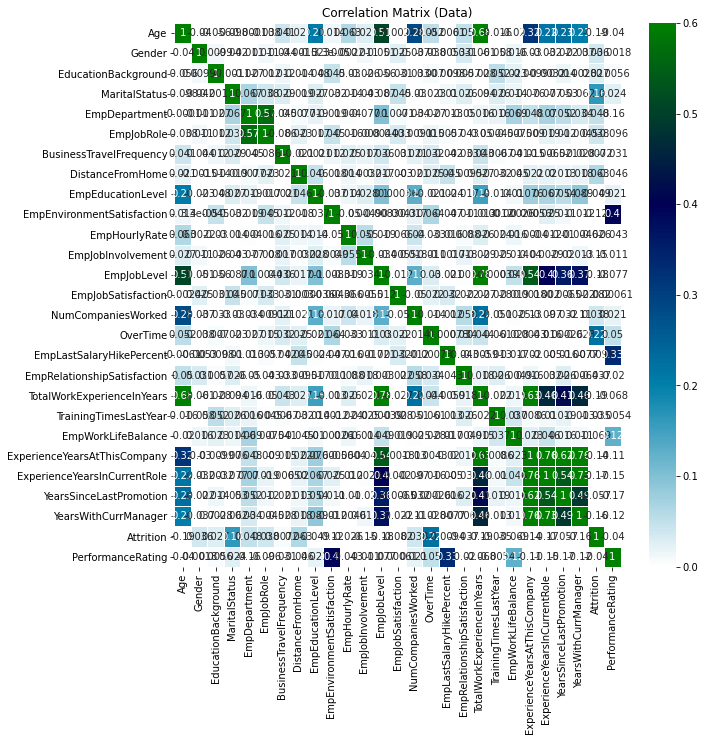

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,annot=True,annot_kws={"size":10},linewidths=1,vmin=0,vmax=0.6,cmap='ocean_r')
plt.title("Correlation Matrix (Data)")
plt.show() # let's make it clear.

In [42]:
Data.corr().PerformanceRating  

Age                            -0.040164
Gender                         -0.001780
EducationBackground             0.005607
MaritalStatus                   0.024172
EmpDepartment                  -0.162615
EmpJobRole                     -0.096209
BusinessTravelFrequency        -0.031025
DistanceFromHome               -0.046142
EmpEducationLevel               0.020529
EmpEnvironmentSatisfaction      0.395561
EmpHourlyRate                  -0.043116
EmpJobInvolvement              -0.010539
EmpJobLevel                    -0.076632
EmpJobSatisfaction              0.000606
NumCompaniesWorked              0.020980
OverTime                        0.050206
EmpLastSalaryHikePercent        0.333722
EmpRelationshipSatisfaction    -0.019502
TotalWorkExperienceInYears     -0.068141
TrainingTimesLastYear          -0.005443
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.111645
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
YearsWithCurrMan

In [43]:
Data.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    0              0              3   
4  E1001010   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   ...  EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0  ...                            4                          10   
1  ...                            4                          20   
2  ...                            3                          20   
3  ...                            2                          23   
4  ...                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3  

[5 rows x 28 columns]

In [44]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   int32 
 3   EducationBackground           1200 non-null   int32 
 4   MaritalStatus                 1200 non-null   int32 
 5   EmpDepartment                 1200 non-null   int32 
 6   EmpJobRole                    1200 non-null   int32 
 7   BusinessTravelFrequency       1200 non-null   int32 
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Feature Selection    
-     There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 
-     Standardization and Label Encoding was also used for feature transformation.
-     A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
-     A trained model which can predict the employee performance based on factors as 
      inputs are 1)EmpDepartment,2)EmpJobRole, 3)EmpEnvironmentSatisfaction, 4)EmpLastSalaryHikePercent,5)EmpWorkLifeBalance,6)ExperienceYearsAtThisCompany ,7)ExperienceYearsInCurrentRole,8)YearsSinceLastPromotion, 9)YearsWithCurrManager.

In [45]:
X = Data.iloc[:,[5,6,10,17,21,22,23,24,25]]
X

EmpDepartment  EmpJobRole  EmpEnvironmentSatisfaction  \
0                 5          13                           4   
1                 5          13                           4   
2                 5          13                           4   
3                 3           8                           2   
4                 5          13                           1   
...             ...         ...                         ...   
1195              5          13                           4   
1196              1          15                           4   
1197              1          15                           4   
1198              0           1                           4   
1199              5          13                           1   

      EmpLastSalaryHikePercent  EmpWorkLifeBalance  \
0                           12                   2   
1                           12                   3   
2                           21                   3   
3                           15                   2   
4                           14                   3   
...                        ...                 ...   
1195                        20                   3   
1196                        17                   3   
1197                        11                   3   
1198                        14                   4   
1199                        14                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

      YearsSinceLastPromotion  YearsWithCurrManager  
0                           0                     8  
1                           1                     7  
2                           1                    12  
3                          12                     6  
4                           2                     2  
...                       ...                   ...  
1195                        0                     4  
1196                        0                     0  
1197                        3                     8  
1198                        7                     7  
1199                        2                     0  

[1200 rows x 9 columns]

In [46]:
len(X)

1200

In [47]:
Y = Data.loc[:,['PerformanceRating']]
Y

PerformanceRating
0                     3
1                     3
2                     4
3                     3
4                     3
...                 ...
1195                  4
1196                  3
1197                  3
1198                  3
1199                  2

[1200 rows x 1 columns]

In [48]:
len(Y)

1200

### Step-5 : Splitting the Dataset in to Test set and Training test 

In [49]:
#x = data.input_features
#y = data.output_features
X = X = Data.iloc[:,[5,6,10,17,21,22,23,24,25]]
Y = Data.loc[:,['PerformanceRating']]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size = 0.2,random_state=0)

### Step - 6 : Feature Scaling 

In [51]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
X_train.shape

(960, 9)

In [53]:
X_test.shape

(240, 9)

### MACHINE LEARNING ENGINEERING

### Step-7 : Model Selection 

### 1. Logistic Regression Classification:

In [54]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [55]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [56]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.8291666666666667
              precision    recall  f1-score   support

           2       0.74      0.42      0.54        33
           3       0.85      0.94      0.89       179
           4       0.73      0.57      0.64        28

    accuracy                           0.83       240
   macro avg       0.77      0.65      0.69       240
weighted avg       0.82      0.83      0.82       240



In [57]:
confusion_matrix(y_test,y_predict_log)

array([[ 14,  18,   1],
       [  5, 169,   5],
       [  0,  12,  16]], dtype=int64)

### 2.Support Vector Machine from SVC Model :

In [58]:
# Training the model
from sklearn.svm import SVC
Model_svc = SVC(kernel='rbf', C=100, random_state=0)

In [59]:
Model_svc.fit(X_train, y_train)

SVC(C=100, random_state=0)

In [60]:
# Predicting the model
y_predict_svm = Model_svc.predict(X_test)

In [61]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8666666666666667
              precision    recall  f1-score   support

           2       0.73      0.82      0.77        33
           3       0.94      0.89      0.92       179
           4       0.64      0.75      0.69        28

    accuracy                           0.87       240
   macro avg       0.77      0.82      0.79       240
weighted avg       0.88      0.87      0.87       240



### 3. Decision Tree Classification Model :

In [62]:
# Training the model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [63]:
Model_DTC= tree.DecisionTreeClassifier()

In [64]:
Model_DTC.fit(X_train, y_train )

DecisionTreeClassifier()

In [65]:
# Predicting the model
y_predict_dtree = Model_DTC.predict(X_test)

In [66]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9125
              precision    recall  f1-score   support

           2       0.77      0.73      0.75        33
           3       0.93      0.96      0.94       179
           4       0.96      0.86      0.91        28

    accuracy                           0.91       240
   macro avg       0.89      0.85      0.87       240
weighted avg       0.91      0.91      0.91       240



### 4 .  Random forest Classification Model :

In [67]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

In [68]:
modelrf = RandomForestClassifier(n_estimators =48)

In [69]:
modelrf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=48)

In [70]:
modelrf.score(X_test,y_test)*100

95.41666666666667

In [71]:
# Predicting the model
y_predict_rf = modelrf.predict(X_test)

In [72]:
y_predict_rf

array([3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4,
       2, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 4,
       3, 4, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 4, 4, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 2, 2, 4, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [73]:
MYARRAY = y_predict_rf
MYARRAY

array([3, 4, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4,
       2, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 4,
       3, 4, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 2, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 4, 4, 3, 3, 4, 3,
       2, 3, 3, 3, 3, 3, 2, 2, 4, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [74]:
# Convert the array to a DataFrame
my_dataframe = pd.DataFrame(MYARRAY)
my_dataframe

0
0    3
1    4
2    3
3    3
4    3
..  ..
235  3
236  3
237  3
238  3
239  3

[240 rows x 1 columns]

In [75]:
DF2 = my_dataframe.rename(columns={0:'PerformanceRating'})
DF2

PerformanceRating
0                    3
1                    4
2                    3
3                    3
4                    3
..                 ...
235                  3
236                  3
237                  3
238                  3
239                  3

[240 rows x 1 columns]

In [76]:
ARRAY = X_test
ARRAY

array([[ 0.45234384,  0.20101725,  1.2010435 , ...,  1.02554634,
         1.47756741,  1.12066982],
       [ 1.04155698,  0.83720371,  0.28885856, ...,  0.7505395 ,
        -0.66883402,  1.12066982],
       [ 1.04155698,  0.83720371,  0.28885856, ..., -0.6244947 ,
        -0.36220524, -0.58973245],
       ...,
       [-0.72608244, -1.07135567,  1.2010435 , ...,  0.7505395 ,
        -0.66883402,  0.83560277],
       [ 0.45234384, -0.0110449 , -1.53551131, ..., -0.07448102,
        -0.66883402, -0.58973245],
       [ 1.04155698,  0.83720371,  0.28885856, ..., -0.07448102,
        -0.66883402, -0.3046654 ]])

In [77]:
my_dataframe2 = pd.DataFrame(ARRAY)
my_dataframe2

0         1         2         3         4         5         6  \
0    0.452344  0.201017  1.201044 -1.167988 -1.057590  1.086876  1.025546   
1    1.041557  0.837204  0.288859 -0.053130  1.790338  0.457468  0.750540   
2    1.041557  0.837204  0.288859  0.504299  0.366374 -0.643996 -0.624495   
3    1.041557  1.049266  0.288859 -0.889273  0.366374 -0.958700 -1.174508   
4    1.041557  1.049266 -0.623326  1.340442 -1.057590 -0.486644 -0.624495   
..        ...       ...       ...       ...       ...       ...       ...   
235  1.041557  1.049266  1.201044 -0.331844  0.366374 -0.643996 -0.624495   
236 -1.315296  1.261328  1.201044 -0.610559  0.366374 -0.801348 -0.624495   
237 -0.726082 -1.071356  1.201044 -1.167988  0.366374 -0.014588  0.750540   
238  0.452344 -0.011045 -1.535511  1.897871  0.366374 -0.329292 -0.074481   
239  1.041557  0.837204  0.288859 -1.167988  1.790338 -0.329292 -0.074481   

            7         8  
0    1.477567  1.120670  
1   -0.668834  1.120670  
2   -0.362205 -0.589732  
3   -0.668834 -1.159867  
4   -0.668834 -0.304665  
..        ...       ...  
235 -0.362205 -0.589732  
236 -0.055576 -0.589732  
237 -0.668834  0.835603  
238 -0.668834 -0.589732  
239 -0.668834 -0.304665  

[240 rows x 9 columns]

In [78]:
DF3 = my_dataframe2.rename(columns={0:'EmpDepartment',1:'EmpJobRole', 2:'EmpEnvironmentSatisfaction',3:'EmpLastSalaryHikePercent', 4:'EmpWorkLifeBalance', 5:'ExperienceYearsAtThisCompany',6:'ExperienceYearsInCurrentRole', 7:'YearsSinceLastPromotion', 8:'YearsWithCurrManager'})
DF3

EmpDepartment  EmpJobRole  EmpEnvironmentSatisfaction  \
0         0.452344    0.201017                    1.201044   
1         1.041557    0.837204                    0.288859   
2         1.041557    0.837204                    0.288859   
3         1.041557    1.049266                    0.288859   
4         1.041557    1.049266                   -0.623326   
..             ...         ...                         ...   
235       1.041557    1.049266                    1.201044   
236      -1.315296    1.261328                    1.201044   
237      -0.726082   -1.071356                    1.201044   
238       0.452344   -0.011045                   -1.535511   
239       1.041557    0.837204                    0.288859   

     EmpLastSalaryHikePercent  EmpWorkLifeBalance  \
0                   -1.167988           -1.057590   
1                   -0.053130            1.790338   
2                    0.504299            0.366374   
3                   -0.889273            0.366374   
4                    1.340442           -1.057590   
..                        ...                 ...   
235                 -0.331844            0.366374   
236                 -0.610559            0.366374   
237                 -1.167988            0.366374   
238                  1.897871            0.366374   
239                 -1.167988            1.790338   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                        1.086876                      1.025546   
1                        0.457468                      0.750540   
2                       -0.643996                     -0.624495   
3                       -0.958700                     -1.174508   
4                       -0.486644                     -0.624495   
..                            ...                           ...   
235                     -0.643996                     -0.624495   
236                     -0.801348                     -0.624495   
237                     -0.014588                      0.750540   
238                     -0.329292                     -0.074481   
239                     -0.329292                     -0.074481   

     YearsSinceLastPromotion  YearsWithCurrManager  
0                   1.477567              1.120670  
1                  -0.668834              1.120670  
2                  -0.362205             -0.589732  
3                  -0.668834             -1.159867  
4                  -0.668834             -0.304665  
..                       ...                   ...  
235                -0.362205             -0.589732  
236                -0.055576             -0.589732  
237                -0.668834              0.835603  
238                -0.668834             -0.589732  
239                -0.668834             -0.304665  

[240 rows x 9 columns]

In [79]:
RFMODELPRED = pd.concat([DF3, DF2], axis=1)
RFMODELPRED

EmpDepartment  EmpJobRole  EmpEnvironmentSatisfaction  \
0         0.452344    0.201017                    1.201044   
1         1.041557    0.837204                    0.288859   
2         1.041557    0.837204                    0.288859   
3         1.041557    1.049266                    0.288859   
4         1.041557    1.049266                   -0.623326   
..             ...         ...                         ...   
235       1.041557    1.049266                    1.201044   
236      -1.315296    1.261328                    1.201044   
237      -0.726082   -1.071356                    1.201044   
238       0.452344   -0.011045                   -1.535511   
239       1.041557    0.837204                    0.288859   

     EmpLastSalaryHikePercent  EmpWorkLifeBalance  \
0                   -1.167988           -1.057590   
1                   -0.053130            1.790338   
2                    0.504299            0.366374   
3                   -0.889273            0.366374   
4                    1.340442           -1.057590   
..                        ...                 ...   
235                 -0.331844            0.366374   
236                 -0.610559            0.366374   
237                 -1.167988            0.366374   
238                  1.897871            0.366374   
239                 -1.167988            1.790338   

     ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                        1.086876                      1.025546   
1                        0.457468                      0.750540   
2                       -0.643996                     -0.624495   
3                       -0.958700                     -1.174508   
4                       -0.486644                     -0.624495   
..                            ...                           ...   
235                     -0.643996                     -0.624495   
236                     -0.801348                     -0.624495   
237                     -0.014588                      0.750540   
238                     -0.329292                     -0.074481   
239                     -0.329292                     -0.074481   

     YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
0                   1.477567              1.120670                  3  
1                  -0.668834              1.120670                  4  
2                  -0.362205             -0.589732                  3  
3                  -0.668834             -1.159867                  3  
4                  -0.668834             -0.304665                  3  
..                       ...                   ...                ...  
235                -0.362205             -0.589732                  3  
236                -0.055576             -0.589732                  3  
237                -0.668834              0.835603                  3  
238                -0.668834             -0.589732                  3  
239                -0.668834             -0.304665                  3  

[240 rows x 10 columns]

In [80]:
RFMODELPRED.shape

(240, 10)

In [81]:
RFMODELPRED.size

2400

In [82]:
# Save the DataFrame to a CSV file
RFMODELPRED.to_csv('Predectdata.csv', index=False)

In [83]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9541666666666667
              precision    recall  f1-score   support

           2       0.94      0.94      0.94        33
           3       0.97      0.97      0.97       179
           4       0.89      0.86      0.87        28

    accuracy                           0.95       240
   macro avg       0.93      0.92      0.93       240
weighted avg       0.95      0.95      0.95       240



## 5. XGBoost Classifier Model :

In [84]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

[11:30:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [86]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.9291666666666667
              precision    recall  f1-score   support

           2       0.82      0.85      0.84        33
           3       0.96      0.96      0.96       179
           4       0.89      0.86      0.87        28

    accuracy                           0.93       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.93      0.93      0.93       240



### Final Evaluation scores of  the models :

-     In the section below, we used algorithms like 1)Logistic Regression, 2)Support Vector Machine, 3)Decision Tree, 4)Random Forest, 5)XGBoost Classifier to calculate the accuracy and found out that final accuracy scores as per the bellow:

   1. XGBoost Classifier       gives the maximum accuracy of 93%.
   2. Ramdom Forest gives the maxumum acuracy of 95%

###                                              ***   E N D  of the ML Moldel Prediction ***

In [87]:
import pickle

In [88]:
# Creating a pickle file for the classifier
filename = 'Emppprediction-rfc-model.pkl'
pickle.dump(modelrf, open(filename, 'wb'))

## NEO4J GRAPH DATABASE CONNECTVITY

### Converting the Model Prediction of the Fature values into Neo4j Graph Database to be      visulise Graphs

In [32]:
#RFMODELPRED.head()[ Note: its predicted values]
GRAPHDB.head()

EmpNumber    EmpDepartment       EmpJobRole  EmpEnvironmentSatisfaction  \
0  E1001000            Sales  Sales Executive                           4   
1  E1001006            Sales  Sales Executive                           4   
2  E1001007            Sales  Sales Executive                           4   
3  E1001009  Human Resources          Manager                           2   
4  E1001010            Sales  Sales Executive                           1   

   EmpLastSalaryHikePercent  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                        12                   2                            10   
1                        12                   3                             7   
2                        21                   3                            18   
3                        15                   2                            21   
4                        14                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  PerformanceRating  
0                     8                  3  
1                     7                  3  
2                    12                  4  
3                     6                  3  
4                     2                  3

In [33]:
GRAPHDB.dtypes

EmpNumber                       object
EmpDepartment                   object
EmpJobRole                      object
EmpEnvironmentSatisfaction       int64
EmpLastSalaryHikePercent         int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
PerformanceRating                int64
dtype: object

In [34]:
GRAPHDB.dtypes.value_counts()

int64     8
object    3
dtype: int64

In [35]:
GRAPHDB.nunique()

EmpNumber                       1200
EmpDepartment                      6
EmpJobRole                        19
EmpEnvironmentSatisfaction         4
EmpLastSalaryHikePercent          15
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
PerformanceRating                  3
dtype: int64

In [36]:
# identifying the types of Departments
GRAPHDB["EmpNumber"].unique()#Here displayed the columun'EmpDepartment' of number of unique numbers

array(['E1001000', 'E1001006', 'E1001007', ..., 'E100994', 'E100995',
       'E100998'], dtype=object)

In [76]:
GRAPHDB["EmpNumber"].unique()

array(['E1001000', 'E1001006', 'E1001007', ..., 'E100994', 'E100995',
       'E100998'], dtype=object)

In [77]:
GRAPHDB["EmpNumber"].nunique()

1200

In [79]:
EmpNumbers = GRAPHDB["EmpNumber"].unique()
EmpNumbers

array(['E1001000', 'E1001006', 'E1001007', ..., 'E100994', 'E100995',
       'E100998'], dtype=object)

In [40]:
# identifying the types of Departments
GRAPHDB["EmpDepartment"].unique()#Here displayed the columun'EmpDepartment' of number of unique numbers

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [41]:
GRAPHDB["EmpDepartment"].nunique()

6

In [42]:
GRAPHDB.loc[:,"EmpDepartment"].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [43]:
EmpDepartments = GRAPHDB["EmpDepartment"].unique()
EmpDepartments

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [44]:
GRAPHDB["EmpJobRole"].nunique()

19

In [45]:
GRAPHDB.loc[:,"EmpJobRole"].value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [46]:
EmpjobRoles = GRAPHDB["EmpJobRole"].unique()
EmpjobRoles

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [47]:
GRAPHDB["EmpEnvironmentSatisfaction"].unique()

array([4, 2, 1, 3], dtype=int64)

In [48]:
EmpEnvironmentSatisfactions = GRAPHDB["EmpEnvironmentSatisfaction"].unique()
EmpEnvironmentSatisfactions

array([4, 2, 1, 3], dtype=int64)

In [49]:
GRAPHDB["EmpLastSalaryHikePercent"].unique()

array([12, 21, 15, 14, 13, 23, 11, 20, 19, 17, 18, 22, 16, 24, 25],
      dtype=int64)

In [50]:
EmpLastSalaryHikePercents = GRAPHDB["EmpLastSalaryHikePercent"].unique()
EmpLastSalaryHikePercents

array([12, 21, 15, 14, 13, 23, 11, 20, 19, 17, 18, 22, 16, 24, 25],
      dtype=int64)

In [71]:
GRAPHDB.loc[:,"PerformanceRating"].value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [72]:
performanceRatings = GRAPHDB.loc[:,"PerformanceRating"].value_counts()
performanceRatings

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

#### 1.Importing the Neo4j Graph Data base libraries to connectivity

In [52]:
import pandas as pd
from neo4j import GraphDatabase

In [53]:
#GraphDatabase?   # [Note: its showing all the status of the Neo4j drivers]
#GraphDatabase??

In [54]:
# establish the connection
Graphdb=GraphDatabase.driver(uri = "bolt://44.214.142.133:7687", auth=("neo4j", "accessories-pulse-torpedoes"))

In [55]:
# How can we load csv file from our desktop?
#session = Graphdb.session()
 #LOAD CSV WITH HEADERS FROM "file:///c:/GRAPHDB.csv" AS row
#MERGE (n:MyNode){Name:line.EmpNumber})
#MERGE (n:MyNode){Name:line.EmpDepartment})

#q1= "CREATE (n:Empid{name:'EmpNumber'})"


In [56]:
Graphdb

In [57]:
session = Graphdb.session()
session

In [58]:
# create node with label, properties

session = Graphdb.session()

q1= "CREATE (n:EmpNumber{EmpNumber: $EmpNumber, name: $EmpNumber})"

for Aname in EmpNumbers:
    x= GRAPHDB.groupby("EmpNumber").get_group(Aname)["EmpNumber"]
    for sname in x:
        p={"EmpNumber":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:EmpNumber) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:0' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001000', 'name': 'E1001000'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001006', 'name': 'E1001006'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001007', 'name': 'E1001007'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001009', 'name': 'E1001009'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001010', 'name': 'E1001010'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001011', 'name': 'E1001011'}>>
<Record n=<Node element_id='4:ee6f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:97' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001180', 'name': 'E1001180'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:98' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001181', 'name': 'E1001181'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:99' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001182', 'name': 'E1001182'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:100' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001183', 'name': 'E1001183'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:101' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001187', 'name': 'E1001187'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:102' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001188', 'name': 'E1001188'}>>
<Record n=<Node element_i

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:152' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001280', 'name': 'E1001280'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:153' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001281', 'name': 'E1001281'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:154' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001282', 'name': 'E1001282'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:155' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001283', 'name': 'E1001283'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:156' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001284', 'name': 'E1001284'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:157' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001288', 'name': 'E1001288'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:205' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001361', 'name': 'E1001361'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:206' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001362', 'name': 'E1001362'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:207' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001366', 'name': 'E1001366'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:208' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001370', 'name': 'E1001370'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:209' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001372', 'name': 'E1001372'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:210' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001374', 'name': 'E1001374'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:272' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001482', 'name': 'E1001482'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:273' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001484', 'name': 'E1001484'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:274' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001485', 'name': 'E1001485'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:275' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001489', 'name': 'E1001489'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:276' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001490', 'name': 'E1001490'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:277' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001493', 'name': 'E1001493'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:326' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001579', 'name': 'E1001579'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:327' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001581', 'name': 'E1001581'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:328' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001582', 'name': 'E1001582'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:329' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001584', 'name': 'E1001584'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:330' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001585', 'name': 'E1001585'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:331' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001586', 'name': 'E1001586'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:395' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001712', 'name': 'E1001712'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:396' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001713', 'name': 'E1001713'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:397' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001716', 'name': 'E1001716'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:398' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001717', 'name': 'E1001717'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:399' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001718', 'name': 'E1001718'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:400' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001719', 'name': 'E1001719'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:447' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001811', 'name': 'E1001811'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:448' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001812', 'name': 'E1001812'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:449' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001813', 'name': 'E1001813'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:450' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001817', 'name': 'E1001817'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:451' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001820', 'name': 'E1001820'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:452' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001821', 'name': 'E1001821'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:528' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001943', 'name': 'E1001943'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:529' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001944', 'name': 'E1001944'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:530' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001945', 'name': 'E1001945'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:531' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001947', 'name': 'E1001947'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:532' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001948', 'name': 'E1001948'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:533' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001949', 'name': 'E1001949'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:636' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002137', 'name': 'E1002137'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:637' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002138', 'name': 'E1002138'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:638' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002140', 'name': 'E1002140'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:639' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002141', 'name': 'E1002141'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:640' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002142', 'name': 'E1002142'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:641' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002143', 'name': 'E1002143'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:771' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100292', 'name': 'E100292'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:772' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100294', 'name': 'E100294'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:773' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100296', 'name': 'E100296'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:774' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100297', 'name': 'E100297'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:775' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100298', 'name': 'E100298'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:776' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100300', 'name': 'E100300'}>>
<Record n=<Node element_id='4:ee6f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:890' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100486', 'name': 'E100486'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:891' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100492', 'name': 'E100492'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:892' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100493', 'name': 'E100493'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:893' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100494', 'name': 'E100494'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:894' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100496', 'name': 'E100496'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:895' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100499', 'name': 'E100499'}>>
<Record n=<Node element_id='4:ee6f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1000' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100668', 'name': 'E100668'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1001' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100669', 'name': 'E100669'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1002' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100670', 'name': 'E100670'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1003' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100671', 'name': 'E100671'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1004' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100672', 'name': 'E100672'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1005' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100673', 'name': 'E100673'}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1129' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100865', 'name': 'E100865'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1130' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100868', 'name': 'E100868'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1131' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100869', 'name': 'E100869'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1132' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100870', 'name': 'E100870'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1133' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100871', 'name': 'E100871'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1134' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100873', 'name': 'E100873'}>>
<Record n=<Node element_id='

In [59]:
#q2= "CREATE (n:EmpDept{name:'EmpDepartment'})"
# create node with label, properties

session = Graphdb.session()

q1= "CREATE (n:EmpDepartment{EmpDepartment: $EmpDepartment, name: $EmpDepartment})"

for Aname in EmpDepartments:
    x= GRAPHDB.groupby("EmpDepartment").get_group(Aname)["EmpDepartment"]
    for sname in x:
        p={"EmpDepartment":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:EmpDepartment) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1200' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1201' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1202' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1203' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1204' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1205' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1291' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1292' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1293' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1294' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1295' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1296' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1393' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1394' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1395' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1396' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1397' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1398' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1474' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1475' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1476' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1477' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1478' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1479' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1555' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1556' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1557' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1558' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1559' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1560' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1622' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Human Resources', 'name': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1623' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Human Resources', 'name': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1624' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Human Resources', 'name': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1625' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Human Resources', 'name': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1626' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Human Resources', 'name': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:162

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1692' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1693' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1694' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1695' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1696' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1697' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1814' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1815' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1816' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1817' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1818' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1819' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1863' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1864' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1865' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1866' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1867' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1868' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1988' labels=frozenset({'EmpDepartment'}) properties={'name': 'Data Science', 'EmpDepartment': 'Data Science'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1989' labels=frozenset({'EmpDepartment'}) properties={'name': 'Data Science', 'EmpDepartment': 'Data Science'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1990' labels=frozenset({'EmpDepartment'}) properties={'name': 'Data Science', 'EmpDepartment': 'Data Science'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1991' labels=frozenset({'EmpDepartment'}) properties={'name': 'Data Science', 'EmpDepartment': 'Data Science'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1992' labels=frozenset({'EmpDepartment'}) properties={'name': 'Data Science', 'EmpDepartment': 'Data Science'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1993' labels=frozenset({'EmpDepar

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2097' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2098' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2099' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2100' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2101' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2200' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2201' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2202' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2203' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2204' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2309' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2310' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2311' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2312' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2313' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


In [60]:
# create node with label, properties
#q3= "CREATE (n:EmpJob{name:'EmpJobRole'})"

session = Graphdb.session()

q1= "CREATE (n:EmpJobRole{EmpJobRole: $EmpJobRole, name: $EmpJobRole})"

for Aname in EmpjobRoles:
    x= GRAPHDB.groupby("EmpJobRole").get_group(Aname)["EmpJobRole"]
    for sname in x:
        p={"EmpJobRole":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:EmpJobRole) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2400' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2401' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2402' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2403' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2404' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2405' labels=frozenset({'EmpJobRo

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2469' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2470' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2471' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2472' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2473' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2474' labels=frozenset({'EmpJobRo

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2538' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2539' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2540' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2541' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2542' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2543' labels=frozenset({'EmpJobRo

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2584' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2585' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2586' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2587' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2588' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2589' labels=frozenset({'EmpJobRo

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2630' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2631' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2632' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2633' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2634' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Executive', 'EmpJobRole': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2635' labels=frozenset({'EmpJobRo

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2690' labels=frozenset({'EmpJobRole'}) properties={'name': 'Manager', 'EmpJobRole': 'Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2691' labels=frozenset({'EmpJobRole'}) properties={'name': 'Manager', 'EmpJobRole': 'Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2692' labels=frozenset({'EmpJobRole'}) properties={'name': 'Manager', 'EmpJobRole': 'Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2693' labels=frozenset({'EmpJobRole'}) properties={'name': 'Manager', 'EmpJobRole': 'Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2694' labels=frozenset({'EmpJobRole'}) properties={'name': 'Manager', 'EmpJobRole': 'Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2695' labels=frozenset({'EmpJobRole'}) properties={'name': 'Manager', 'EmpJobRole': 'Manager'}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2820' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2821' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2822' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2823' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2824' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2825' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Develo

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2884' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2885' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2886' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2887' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2888' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2889' labels=frozenset({'EmpJobRole'}) properties={'name': 'Developer', 'EmpJobRole': 'Develo

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2971' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Representative', 'EmpJobRole': 'Sales Representative'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2972' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Representative', 'EmpJobRole': 'Sales Representative'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2973' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Representative', 'EmpJobRole': 'Sales Representative'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2974' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Representative', 'EmpJobRole': 'Sales Representative'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2975' labels=frozenset({'EmpJobRole'}) properties={'name': 'Sales Representative', 'EmpJobRole': 'Sales Representative'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3034' labels=frozenset({'EmpJobRole'}) properties={'name': 'Human Resources', 'EmpJobRole': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3035' labels=frozenset({'EmpJobRole'}) properties={'name': 'Human Resources', 'EmpJobRole': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3036' labels=frozenset({'EmpJobRole'}) properties={'name': 'Human Resources', 'EmpJobRole': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3037' labels=frozenset({'EmpJobRole'}) properties={'name': 'Human Resources', 'EmpJobRole': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3038' labels=frozenset({'EmpJobRole'}) properties={'name': 'Human Resources', 'EmpJobRole': 'Human Resources'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3039' labels=frozenset({'EmpJobRo

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3113' labels=frozenset({'EmpJobRole'}) properties={'name': 'Senior Developer', 'EmpJobRole': 'Senior Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3114' labels=frozenset({'EmpJobRole'}) properties={'name': 'Senior Developer', 'EmpJobRole': 'Senior Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3115' labels=frozenset({'EmpJobRole'}) properties={'name': 'Senior Developer', 'EmpJobRole': 'Senior Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3116' labels=frozenset({'EmpJobRole'}) properties={'name': 'Senior Developer', 'EmpJobRole': 'Senior Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3117' labels=frozenset({'EmpJobRole'}) properties={'name': 'Senior Developer', 'EmpJobRole': 'Senior Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3118' labels=frozenset(

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3189' labels=frozenset({'EmpJobRole'}) properties={'name': 'Laboratory Technician', 'EmpJobRole': 'Laboratory Technician'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3190' labels=frozenset({'EmpJobRole'}) properties={'name': 'Laboratory Technician', 'EmpJobRole': 'Laboratory Technician'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3191' labels=frozenset({'EmpJobRole'}) properties={'name': 'Laboratory Technician', 'EmpJobRole': 'Laboratory Technician'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3192' labels=frozenset({'EmpJobRole'}) properties={'name': 'Laboratory Technician', 'EmpJobRole': 'Laboratory Technician'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3193' labels=frozenset({'EmpJobRole'}) properties={'name': 'Laboratory Technician', 'EmpJobRole': 'Laboratory Technician'}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3261' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Scientist', 'EmpJobRole': 'Research Scientist'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3262' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Scientist', 'EmpJobRole': 'Research Scientist'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3263' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Scientist', 'EmpJobRole': 'Research Scientist'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3264' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Scientist', 'EmpJobRole': 'Research Scientist'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3265' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Scientist', 'EmpJobRole': 'Research Scientist'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:326

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3366' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Director', 'EmpJobRole': 'Research Director'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3367' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Director', 'EmpJobRole': 'Research Director'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3368' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Director', 'EmpJobRole': 'Research Director'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3369' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Director', 'EmpJobRole': 'Research Director'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3370' labels=frozenset({'EmpJobRole'}) properties={'name': 'Research Director', 'EmpJobRole': 'Research Director'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3371' labels=

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3522' labels=frozenset({'EmpJobRole'}) properties={'name': 'Finance Manager', 'EmpJobRole': 'Finance Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3523' labels=frozenset({'EmpJobRole'}) properties={'name': 'Finance Manager', 'EmpJobRole': 'Finance Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3524' labels=frozenset({'EmpJobRole'}) properties={'name': 'Finance Manager', 'EmpJobRole': 'Finance Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3525' labels=frozenset({'EmpJobRole'}) properties={'name': 'Finance Manager', 'EmpJobRole': 'Finance Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3526' labels=frozenset({'EmpJobRole'}) properties={'name': 'Finance Manager', 'EmpJobRole': 'Finance Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3527' labels=frozenset({'EmpJobRo

In [61]:
# create node with label, properties
#q4= "CREATE (n:EmpEnvs{name:'EmpEnvironmentSatisfaction'})"

session = Graphdb.session()

q1= "CREATE (n:EmpEnv{EmpEnvironmentSatisfaction: $EmpEnvironmentSatisfaction, name: $EmpEnvironmentSatisfaction})"

for Aname in EmpEnvironmentSatisfactions:
    x= GRAPHDB.groupby("EmpEnvironmentSatisfaction").get_group(Aname)["EmpEnvironmentSatisfaction"]
    for sname in x:
        p={"EmpEnvironmentSatisfaction":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:EmpEnv) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3600' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3601' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3602' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3603' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3604' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3605' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3654' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3655' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3656' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3657' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3658' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3659' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3723' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3724' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3725' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3726' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3727' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3728' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3789' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3790' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3791' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3792' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3793' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3794' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3842' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3843' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3844' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3845' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3846' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3847' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3911' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3912' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3913' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3914' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3915' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3916' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4044' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4045' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4046' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4047' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4048' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4049' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4112' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4113' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4114' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4115' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4116' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4117' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4247' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4248' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4249' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4250' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4251' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4252' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4313' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4314' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4315' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4316' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4317' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4318' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4429' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4430' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4431' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4432' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4433' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4434' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4531' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4532' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4533' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4534' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4535' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4536' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4600' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4601' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4602' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4603' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4604' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4605' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4685' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4686' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4687' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4688' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4689' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4690' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4779' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4780' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4781' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4782' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4783' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4784' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

In [63]:
# create node with label, properties
#q6= "CREATE (n:EmpSalHP{name:'EmpLastSalaryHikePercent'})"

session = Graphdb.session()

q1= "CREATE (n:EmpLSalHP{EmpLastSalaryHikePercent: $EmpLastSalaryHikePercent, name: $EmpLastSalaryHikePercent})"

for Aname in EmpLastSalaryHikePercents:
    x= GRAPHDB.groupby("EmpLastSalaryHikePercent").get_group(Aname)["EmpLastSalaryHikePercent"]
    for sname in x:
        p={"EmpLastSalaryHikePercent":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:EmpLSalHP) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4800' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4801' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4802' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4803' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4804' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4805' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4854' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4855' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4856' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4857' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4858' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4859' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4946' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4947' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4948' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4949' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4950' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4951' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 12, 'name': 12}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5001' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5002' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5003' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5004' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5005' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5006' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5053' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5054' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5055' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5056' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5057' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5058' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 15, 'name': 15}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5133' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5134' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5135' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5136' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5137' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5138' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5213' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5214' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5215' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5216' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5217' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5218' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 14, 'name': 14}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5305' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5306' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5307' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5308' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5309' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5310' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5373' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5374' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5375' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5376' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5377' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5378' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 13, 'name': 13}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5480' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5481' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5482' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5483' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5484' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5485' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5586' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5587' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5588' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5589' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5590' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5591' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 11, 'name': 11}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5693' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 19, 'name': 19}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5694' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 19, 'name': 19}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5695' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 19, 'name': 19}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5696' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 19, 'name': 19}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5697' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 19, 'name': 19}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5698' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 19, 'name': 19}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5800' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 18, 'name': 18}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5801' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 18, 'name': 18}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5802' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 18, 'name': 18}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5803' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 18, 'name': 18}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5804' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 18, 'name': 18}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5805' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 18, 'name': 18}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5910' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5911' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5912' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5913' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5914' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5915' labels=frozenset({'EmpLSalHP'}) properties={'EmpLastSalaryHikePercent': 16, 'name': 16}>>
<Record n=<Node elemen

In [64]:
GRAPHDB["EmpWorkLifeBalance"].unique()

array([2, 3, 4, 1], dtype=int64)

In [66]:
EmpWorkLifeBalances = GRAPHDB["EmpWorkLifeBalance"].unique()
EmpWorkLifeBalances

array([2, 3, 4, 1], dtype=int64)

In [66]:
# create node with label, properties
#q7= "CREATE (n:EmpWLB{name:'EmpWorkLifeBalance'})"
session = Graphdb.session()

q1= "CREATE (n:EmpWLB{EmpWorkLifeBalance: $EmpWorkLifeBalance, name: $EmpWorkLifeBalance})"

for Aname in EmpWorkLifeBalances:
    x= GRAPHDB.groupby("EmpWorkLifeBalance").get_group(Aname)["EmpWorkLifeBalance"]
    for sname in x:
        p={"EmpWorkLifeBalance":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:EmpWLB) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6000' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6001' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6002' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6003' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6004' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6005' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6006' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6102' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6103' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6104' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6105' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6106' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6107' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6108' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6175' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6176' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6177' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6178' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6179' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6180' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6181' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6307' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6308' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6309' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6310' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6311' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6312' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6313' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6394' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6395' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6396' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6397' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6398' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6399' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6400' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6482' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6483' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6484' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6485' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6486' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6487' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6488' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6570' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6571' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6572' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6573' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6574' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6575' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6576' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6690' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6691' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6692' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6693' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6694' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6695' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6696' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6856' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6857' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6858' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6859' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6860' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6861' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6862' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6984' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6985' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6986' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6987' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6988' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6989' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6990' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7117' labels=frozenset({'EmpWLB'}) properties={'name': 4, 'EmpWorkLifeBalance': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7118' labels=frozenset({'EmpWLB'}) properties={'name': 4, 'EmpWorkLifeBalance': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7119' labels=frozenset({'EmpWLB'}) properties={'name': 4, 'EmpWorkLifeBalance': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7120' labels=frozenset({'EmpWLB'}) properties={'name': 4, 'EmpWorkLifeBalance': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7121' labels=frozenset({'EmpWLB'}) properties={'name': 4, 'EmpWorkLifeBalance': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7122' labels=frozenset({'EmpWLB'}) properties={'name': 4, 'EmpWorkLifeBalance': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7123' labels=frozense

In [67]:
GRAPHDB["ExperienceYearsAtThisCompany"].unique()

array([10,  7, 18, 21,  2,  9,  8,  1,  5, 22,  4,  0, 34,  6, 15,  3, 13,
       26, 20, 12, 31, 16, 11, 14, 17, 19, 32, 24, 33, 29, 25, 36, 30, 23,
       27, 37, 40], dtype=int64)

In [68]:
ExperienceYearsAtThisCompanys = GRAPHDB["ExperienceYearsAtThisCompany"].unique()
ExperienceYearsAtThisCompanys

array([10,  7, 18, 21,  2,  9,  8,  1,  5, 22,  4,  0, 34,  6, 15,  3, 13,
       26, 20, 12, 31, 16, 11, 14, 17, 19, 32, 24, 33, 29, 25, 36, 30, 23,
       27, 37, 40], dtype=int64)

In [69]:
# create node with label, properties
#q8= "CREATE (n:ExpYComp{name:'ExperienceYearsAtThisCompany'})"

session = Graphdb.session()

q1= "CREATE (n:ExpYComp{ExperienceYearsAtThisCompany: $ExperienceYearsAtThisCompany, name: $ExperienceYearsAtThisCompany})"

for Aname in ExperienceYearsAtThisCompanys:
    x= GRAPHDB.groupby("ExperienceYearsAtThisCompany").get_group(Aname)["ExperienceYearsAtThisCompany"]
    for sname in x:
        p={"ExperienceYearsAtThisCompany":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:ExpYComp) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7200' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7201' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7202' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7203' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7204' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7205' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7290' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7291' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7292' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7293' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7294' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7295' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 10, 'name': 10}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7342' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7343' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7344' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7345' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7346' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7347' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 7, 'name': 7}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7394' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 21, 'name': 21}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7395' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 21, 'name': 21}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7396' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 21, 'name': 21}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7397' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 21, 'name': 21}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7398' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7399' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 2, 'name': 2}>>
<Record 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7446' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7447' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7448' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7449' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7450' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7451' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 2, 'name': 2}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7523' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7524' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7525' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7526' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7527' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7528' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 9, 'name': 9}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7601' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7602' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7603' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7604' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7605' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7606' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 8, 'name': 8}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7692' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7693' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7694' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7695' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7696' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7697' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 1, 'name': 1}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7782' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7783' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7784' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7785' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7786' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7787' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7890' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7891' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7892' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7893' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7894' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7895' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 5, 'name': 5}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7964' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7965' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7966' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7967' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7968' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7969' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 4, 'name': 4}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8074' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8075' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8076' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8077' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8078' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8079' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 6, 'name': 6}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8200' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8201' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8202' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8203' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8204' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8205' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 3, 'name': 3}>>
<Record n=<Node 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8308' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8309' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8310' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8311' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8312' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 16, 'name': 16}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8313' labels=frozenset({'ExpYComp'}) properties={'ExperienceYearsAtThisCompany': 16, 'name': 16}>>
<Rec

In [70]:
GRAPHDB["ExperienceYearsInCurrentRole"].unique()

array([ 7, 13,  6,  2,  0,  1,  3,  8,  9,  5,  4, 14, 12, 10, 16, 11, 15,
       17, 18], dtype=int64)

In [71]:
ExperienceYearsInCurrentRoles = GRAPHDB["ExperienceYearsInCurrentRole"].unique()
ExperienceYearsInCurrentRoles

array([ 7, 13,  6,  2,  0,  1,  3,  8,  9,  5,  4, 14, 12, 10, 16, 11, 15,
       17, 18], dtype=int64)

In [73]:
# create node with label, properties
#q9= "CREATE (n:EXYCR{name:'ExperienceYearsInCurrentRole'})"

session = Graphdb.session()

q1= "CREATE (n:ExpYCR{ExperienceYearsInCurrentRole: $ExperienceYearsInCurrentRole, name: $ExperienceYearsInCurrentRole})"

for Aname in ExperienceYearsInCurrentRoles:
    x= GRAPHDB.groupby("ExperienceYearsAtThisCompany").get_group(Aname)["ExperienceYearsAtThisCompany"]
    for sname in x:
        p={"ExperienceYearsInCurrentRole":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:ExpYCR) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8400' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8401' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8402' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8403' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8404' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8405' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8452' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8453' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8454' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8455' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8456' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8457' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8518' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8519' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8520' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8521' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8522' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8523' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8571' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8572' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8573' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8574' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8575' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8576' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8624' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8625' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8626' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8627' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8628' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8629' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8703' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8704' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8705' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8706' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8707' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8708' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8782' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8783' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8784' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8785' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8786' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8787' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8862' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8863' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8864' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8865' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8866' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8867' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8941' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8942' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8943' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8944' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8945' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8946' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 8, 'name': 8}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9033' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9034' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9035' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9036' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9037' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9038' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9113' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9114' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9115' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9116' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9117' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9118' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9192' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9193' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9194' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9195' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9196' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9197' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9305' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9306' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9307' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9308' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9309' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9310' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9400' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9401' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9402' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9403' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9404' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9405' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node 

In [64]:
GRAPHDB["YearsSinceLastPromotion"].unique()

array([ 0,  1, 12,  2,  3, 11,  7,  4,  5, 14,  8, 15,  6, 10, 13,  9],
      dtype=int64)

In [65]:
YearsSinceLastPromotions = GRAPHDB["YearsSinceLastPromotion"].unique()
YearsSinceLastPromotions

array([ 0,  1, 12,  2,  3, 11,  7,  4,  5, 14,  8, 15,  6, 10, 13,  9],
      dtype=int64)

In [77]:
# create node with label, properties
#q10= "CREATE (n:YSLP{name:'YearsSinceLastPromotion'})"

session = Graphdb.session()

q1= "CREATE (n:YSLP{YearsSinceLastPromotion: $YearsSinceLastPromotion, name: $YearsSinceLastPromotion})"

for Aname in YearsSinceLastPromotions:
    x= GRAPHDB.groupby("YearsSinceLastPromotion").get_group(Aname)["YearsSinceLastPromotion"]
    for sname in x:
        p={"YearsSinceLastPromotion":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:YSLP) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9512' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9513' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9514' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9515' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9516' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9517' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:951

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9571' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9572' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9573' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9574' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9575' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9576' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:957

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9650' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9651' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9652' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9653' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9654' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9655' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:965

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9752' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9753' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9754' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9755' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9756' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9757' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:975

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9889' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9890' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9891' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9892' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9893' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9894' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:989

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9971' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9972' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9973' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9974' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9975' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9976' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:997

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10077' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10078' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10079' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10080' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10081' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10082' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10176' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10177' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10178' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10179' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10180' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10181' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10260' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10261' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10262' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10263' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10264' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10265' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10345' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10346' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10347' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10348' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10349' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10350' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10428' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10429' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10430' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10431' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10432' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10433' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10512' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10513' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10514' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10515' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10516' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10517' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10643' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10644' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10645' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10646' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10647' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10648' labels=frozenset({'YSLP'}) properties={'YearsSinceLastPromotion': 15, 'name': 15}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2

In [86]:
GRAPHDB["YearsWithCurrManager"].unique()

array([ 8,  7, 12,  6,  2,  5,  0,  4, 13,  3,  1, 16,  9, 17, 11, 10, 14,
       15], dtype=int64)

In [87]:
YearsWithCurrManagers = GRAPHDB["YearsWithCurrManager"].unique()
YearsWithCurrManagers

array([ 8,  7, 12,  6,  2,  5,  0,  4, 13,  3,  1, 16,  9, 17, 11, 10, 14,
       15], dtype=int64)

In [80]:
# create node with label, properties
#q11= "CREATE (n:YSWCM{name:'YearsWithCurrManager'})"

session = Graphdb.session()

q1= "CREATE (n:YSWCM{YearsWithCurrManager: $YearsWithCurrManager, name: $YearsWithCurrManager})"

for Aname in YearsWithCurrManagers:
    x= GRAPHDB.groupby("YearsWithCurrManager").get_group(Aname)["YearsWithCurrManager"]
    for sname in x:
        p={"YearsWithCurrManager":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:YSWCM) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10712' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10713' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10714' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10715' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10716' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10717' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10718' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10769' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10770' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10771' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10772' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10773' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10774' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10775' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10840' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10841' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10842' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10843' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10844' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10845' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10846' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10926' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10927' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10928' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10929' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10930' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10931' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10932' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10984' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10985' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10986' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10987' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10988' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 12, 'name': 12}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10989' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11055' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11056' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11057' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11058' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11059' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11060' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11061' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11112' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11113' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11114' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11115' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11116' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11117' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11118' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11170' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11171' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11172' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11173' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11174' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11175' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11176' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11256' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11257' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11258' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11259' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11260' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11261' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11262' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11340' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11341' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11342' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11343' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11344' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11345' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11346' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11416' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11417' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11418' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11419' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11420' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11421' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11422' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11484' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11485' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11486' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11487' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11488' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11489' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11490' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11589' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11590' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11591' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11592' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11593' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11594' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11595' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11680' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11681' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11682' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11683' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11684' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11685' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11686' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11861' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 17, 'name': 17}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11862' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 17, 'name': 17}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11863' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 17, 'name': 17}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11864' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 17, 'name': 17}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11865' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11866' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 11, 'name': 11}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6

In [81]:
GRAPHDB["PerformanceRating"].unique()

array([3, 4, 2], dtype=int64)

In [82]:
PerformanceRatings = GRAPHDB["PerformanceRating"].unique()
PerformanceRatings

array([3, 4, 2], dtype=int64)

In [83]:
# create node with label, properties
#q12= "CREATE (n:PERFRATE{name:'PerformanceRating'})"
session = Graphdb.session()

q1= "CREATE (n:PERFORATE{PerformanceRating: $PerformanceRating, name: $PerformanceRating})"

for Aname in PerformanceRatings:
    x= GRAPHDB.groupby("PerformanceRating").get_group(Aname)["PerformanceRating"]
    for sname in x:
        p={"PerformanceRating":Aname}
        session.run(q1,p)
        
 # search for created node 
q2= "MATCH (n:PERFORATE) RETURN (n)"
nodes=session.run(q2)
for node in nodes:
       print(node)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11912' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11913' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11914' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11915' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11916' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11917' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11982' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11983' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11984' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11985' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11986' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11987' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12082' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12083' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12084' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12085' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12086' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12087' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:120

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12138' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12139' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12140' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12141' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12142' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12143' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:121

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12195' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12196' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12197' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12198' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12199' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12200' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:122

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12266' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12267' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12268' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12269' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12270' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12271' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:122

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12393' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12394' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12395' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12396' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12397' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12398' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:123

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12478' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12479' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12480' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12481' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12482' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12483' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:124

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12563' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12564' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12565' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12566' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12567' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12568' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:125

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12662' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12663' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12664' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12665' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12666' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12667' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:126

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12747' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12748' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12749' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12750' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12751' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12752' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:127

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12847' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12848' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12849' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12850' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12851' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12852' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:128

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12912' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12913' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12914' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12915' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12916' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12917' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:129

In [84]:
q14 = "MATCH (n) return (n)"
session.run(q14)

In [85]:
nodes=session.run(q14)
nodes

In [86]:
type(nodes)

neo4j._sync.work.result.Result

In [87]:
list(nodes)

[<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:0' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001000', 'name': 'E1001000'}>>,
 <Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001006', 'name': 'E1001006'}>>,
 <Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001007', 'name': 'E1001007'}>>,
 <Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001009', 'name': 'E1001009'}>>,
 <Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001010', 'name': 'E1001010'}>>,
 <Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001011', 'name': 'E1001011'}>>,
 <Record n=<Node eleme

In [88]:
# search all Relationships

#session= Graphdb.session()
#relationships=session.run()
#for relationship in relationships:
 #   print(relationship)

### Creating Relationships between nodes :

In [96]:
##MERGE(A:Empid{name:'EmpNumber'})
q2="""
MERGE(A:EmpJobRole{EmpJobRole:$EmpJobRole})
MERGE(B:EmpDepartment{EmpDepartment:$EmpDepartment})
MERGE(A)-[r:EmpNumber{name:'EmpNumber'}]->(B)
"""
for Aname in EmpjobRoles:
    x= GRAPHDB.groupby("EmpJobRole")[["EmpJobRole","EmpDepartment"]].get_group(Aname)["EmpJobRole"]
    for sname in x:
        p={"EmpJobRole":Aname,"EmpDepartment":sname}
        session.run(q2,p)
        
        # search RELATIONSHIP
session= Graphdb.session()
q2="MATCH (n:EmpNumber) return (n)"
relationships=session.run(q2)
for relationship in relationships:
    print(relationship)
 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:0' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001000', 'name': 'E1001000'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001006', 'name': 'E1001006'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001007', 'name': 'E1001007'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001009', 'name': 'E1001009'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001010', 'name': 'E1001010'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001011', 'name': 'E1001011'}>>
<Record n=<Node element_id='4:ee6f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:129' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001238', 'name': 'E1001238'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:130' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001239', 'name': 'E1001239'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:131' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001245', 'name': 'E1001245'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:132' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001248', 'name': 'E1001248'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:133' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001250', 'name': 'E1001250'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:134' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001252', 'name': 'E1001252'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:358' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001647', 'name': 'E1001647'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:359' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001649', 'name': 'E1001649'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:360' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001650', 'name': 'E1001650'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:361' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001651', 'name': 'E1001651'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:362' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001652', 'name': 'E1001652'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:363' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001653', 'name': 'E1001653'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:681' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002219', 'name': 'E1002219'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:682' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002221', 'name': 'E1002221'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:683' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002222', 'name': 'E1002222'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:684' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002223', 'name': 'E1002223'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:685' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002225', 'name': 'E1002225'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:686' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002226', 'name': 'E1002226'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:966' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100612', 'name': 'E100612'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:967' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100615', 'name': 'E100615'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:968' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100616', 'name': 'E100616'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:969' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100617', 'name': 'E100617'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:970' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100618', 'name': 'E100618'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:971' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100619', 'name': 'E100619'}>>
<Record n=<Node element_id='4:ee6f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1075' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100779', 'name': 'E100779'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1076' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100780', 'name': 'E100780'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1077' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100783', 'name': 'E100783'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1078' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100786', 'name': 'E100786'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1079' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100788', 'name': 'E100788'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1080' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100789', 'name': 'E100789'}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1150' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100901', 'name': 'E100901'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1151' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100902', 'name': 'E100902'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1152' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100903', 'name': 'E100903'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1153' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100908', 'name': 'E100908'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1154' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100912', 'name': 'E100912'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1155' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100913', 'name': 'E100913'}>>
<Record n=<Node element_id='

In [97]:
q3="""
MERGE(A:EmpJobRole{EmpJobRole:$EmpJobRole})
MERGE(B:EmpDepartment{EmpDepartment:$EmpDepartment})
MERGE (A)-[r:EmpNumber{name:'EmpNumber'}]->(B)
"""
for Aname in EmpDepartments:
    x= GRAPHDB.groupby("EmpDepartment")[["EmpJobRole","EmpDepartment"]].get_group(Aname)["EmpDepartment"]
    for sname in x:
        p2={"EmpJobRole":Aname,"EmpDepartment":sname}
        session.run(q3,p2)
       
      # search RELATIONSHIP
session= Graphdb.session()
q3="MATCH (n:EmpNumber) return (n)"
relationships=session.run(q3)
for relationship in relationships:
    print(relationship)
 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:0' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001000', 'name': 'E1001000'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001006', 'name': 'E1001006'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001007', 'name': 'E1001007'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001009', 'name': 'E1001009'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001010', 'name': 'E1001010'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001011', 'name': 'E1001011'}>>
<Record n=<Node element_id='4:ee6f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:115' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001214', 'name': 'E1001214'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:116' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001217', 'name': 'E1001217'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:117' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001218', 'name': 'E1001218'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:118' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001219', 'name': 'E1001219'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001220', 'name': 'E1001220'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:120' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001223', 'name': 'E1001223'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:223' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001396', 'name': 'E1001396'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:224' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001397', 'name': 'E1001397'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:225' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001398', 'name': 'E1001398'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:226' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001399', 'name': 'E1001399'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:227' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001402', 'name': 'E1001402'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:228' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001403', 'name': 'E1001403'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:465' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001835', 'name': 'E1001835'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:466' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001838', 'name': 'E1001838'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:467' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001840', 'name': 'E1001840'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:468' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001841', 'name': 'E1001841'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:469' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001846', 'name': 'E1001846'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:470' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001847', 'name': 'E1001847'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:721' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002278', 'name': 'E1002278'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:722' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002281', 'name': 'E1002281'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:723' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002285', 'name': 'E1002285'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:724' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002286', 'name': 'E1002286'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:725' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002287', 'name': 'E1002287'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:726' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002288', 'name': 'E1002288'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:992' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100657', 'name': 'E100657'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:993' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100658', 'name': 'E100658'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:994' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100659', 'name': 'E100659'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:995' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100660', 'name': 'E100660'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:996' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100662', 'name': 'E100662'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:997' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100663', 'name': 'E100663'}>>
<Record n=<Node element_id='4:ee6f

In [103]:
q4="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:EmpDepartment{EmpDepartment:$EmpDepartment})
MERGE (A)-[r:EmpJobRole{EmpJobRole:$EmpJobRole}]->(B)
"""
for Aname in EmpDepartments:
    x= GRAPHDB.groupby("EmpDepartment")[["EmpJobRole","EmpDepartment"]].get_group(Aname)["EmpDepartment"]
    for sname in x:
        p3={"EmpJobRole":Aname,"EmpDepartment":sname}
        session.run(q4,p3)
     
        # search RELATIONSHIP
session= Graphdb.session()
q4="MATCH (n:EmpJobRole) return (n)"
relationships=session.run(q2)
for relationship in relationships:
    print(relationship)
 

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:0' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001000', 'name': 'E1001000'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001006', 'name': 'E1001006'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001007', 'name': 'E1001007'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001009', 'name': 'E1001009'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001010', 'name': 'E1001010'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:5' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001011', 'name': 'E1001011'}>>
<Record n=<Node element_id='4:ee6f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:115' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001214', 'name': 'E1001214'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:116' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001217', 'name': 'E1001217'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:117' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001218', 'name': 'E1001218'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:118' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001219', 'name': 'E1001219'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001220', 'name': 'E1001220'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:120' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001223', 'name': 'E1001223'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:223' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001396', 'name': 'E1001396'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:224' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001397', 'name': 'E1001397'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:225' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001398', 'name': 'E1001398'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:226' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001399', 'name': 'E1001399'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:227' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001402', 'name': 'E1001402'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:228' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001403', 'name': 'E1001403'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:370' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001669', 'name': 'E1001669'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:371' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001670', 'name': 'E1001670'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:372' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001673', 'name': 'E1001673'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:373' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001674', 'name': 'E1001674'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:374' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001675', 'name': 'E1001675'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:375' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001677', 'name': 'E1001677'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:532' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001948', 'name': 'E1001948'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:533' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001949', 'name': 'E1001949'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:534' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001951', 'name': 'E1001951'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:535' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001952', 'name': 'E1001952'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:536' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001958', 'name': 'E1001958'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:537' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1001959', 'name': 'E1001959'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:691' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002233', 'name': 'E1002233'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:692' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002238', 'name': 'E1002238'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:693' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002239', 'name': 'E1002239'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:694' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002240', 'name': 'E1002240'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:695' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002243', 'name': 'E1002243'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:696' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E1002244', 'name': 'E1002244'}>>
<Record n=<Node elemen

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:848' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100412', 'name': 'E100412'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:849' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100416', 'name': 'E100416'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:850' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100417', 'name': 'E100417'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:851' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100419', 'name': 'E100419'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:852' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100420', 'name': 'E100420'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:853' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100421', 'name': 'E100421'}>>
<Record n=<Node element_id='4:ee6f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1000' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100668', 'name': 'E100668'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1001' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100669', 'name': 'E100669'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1002' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100670', 'name': 'E100670'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1003' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100671', 'name': 'E100671'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1004' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100672', 'name': 'E100672'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1005' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100673', 'name': 'E100673'}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1190' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100983', 'name': 'E100983'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1191' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100985', 'name': 'E100985'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1192' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100987', 'name': 'E100987'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1193' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100988', 'name': 'E100988'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1194' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100990', 'name': 'E100990'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1195' labels=frozenset({'EmpNumber'}) properties={'EmpNumber': 'E100992', 'name': 'E100992'}>>
<Record n=<Node element_id='

In [106]:
q5="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:EmpJobRole{EmpJobRole:$EmpJobRole})
MERGE (A)-[r:EmpDepartment{name:'EmpDepartment'}]->(B)
"""
for Aname in EmpjobRoles:
    x= GRAPHDB.groupby("EmpJobRole")[["EmpDepartment","EmpJobRole"]].get_group(Aname)["EmpJobRole"]
    for sname in x:
        p4={"EmpJobRole":Aname,"EmpDepartment":sname}
        session.run(q5,p4)
        # search RELATIONSHIP
session= Graphdb.session()
q5="MATCH (n:EmpDepartment) return (n)"
relationships=session.run(q5)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1200' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1201' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1202' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1203' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1204' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1205' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1308' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1309' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1310' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1311' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1312' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1313' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1373' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1374' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1375' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1376' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1377' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1378' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1487' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1488' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1489' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1490' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1491' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1492' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1564' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1565' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1566' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1567' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1568' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1569' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1688' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1689' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1690' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1691' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1692' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1693' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1808' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1809' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1810' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1811' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1812' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1813' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1930' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1931' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1932' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1933' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1934' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1935' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2060' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2061' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2062' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2063' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2064' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2185' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2186' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2187' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2188' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2189' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2334' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2335' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2336' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2337' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2338' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


In [108]:
q6="""
MERGE(A:EmpJobRole{EmpJobRole:$EmpJobRole})
MERGE(B:EmpDepartment{EmpDepartment:$EmpDepartment})
MERGE (A)-[r:PERFORATE{name:'PerformanceRating'}]->(B)
"""
for Aname in EmpjobRoles:
    x= GRAPHDB.groupby("EmpJobRole")[["EmpDepartment","EmpJobRole"]].get_group(Aname)["EmpJobRole"]
    for sname in x:
        p5={"EmpJobRole":Aname,"EmpDepartment":sname}
        session.run(q6,p5)
        # search RELATIONSHIP
session= Graphdb.session()
q6="MATCH (n:EmpDepartment) return (n)"
relationships=session.run(q6)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1200' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1201' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1202' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1203' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1204' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1205' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1308' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1309' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1310' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1311' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1312' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1313' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1399' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1400' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1401' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1402' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1403' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1404' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1519' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1520' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1521' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1522' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1523' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1524' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1663' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1664' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1665' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1666' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1667' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1668' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1808' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1809' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1810' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1811' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1812' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1813' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1961' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1962' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1963' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1964' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1965' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1966' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2122' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2123' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2124' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2125' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2126' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2200' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2201' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2202' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2203' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2204' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13150' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Sales Executive'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13151' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Manager'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13152' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13153' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Sales Representative'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13154' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Senior Developer'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13155' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Data Scientist'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-

In [58]:
q7="""
MERGE(A:EmpJobRole{EmpJobRole:$EmpJobRole})
MERGE(B:EmpLSalHP{EmpLastSalaryHikePercent:$EmpLastSalaryHikePercent})
MERGE (A)-[r:EmpEnv{name:'EmpEnvironmentSatisfaction'}]->(B)
"""
for Aname in EmpjobRoles:
    x= GRAPHDB.groupby("EmpJobRole")[["EmpJobRole","EmpLastSalaryHikePercent"]].get_group(Aname)["EmpJobRole"]
    for sname in x:
        p6={"EmpJobRole":Aname,"EmpLastSalaryHikePercent":sname}
        session.run(q7,p6)
        # search RELATIONSHIP
session= Graphdb.session()
q7="MATCH (n:EmpEnv) return (n)"
relationships=session.run(q7)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3600' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3601' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3602' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3603' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3604' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3605' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3711' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3712' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3713' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3714' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3715' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3716' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3853' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3854' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3855' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3856' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3857' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3858' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4016' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4017' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4018' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4019' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4020' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4021' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4160' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4161' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4162' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4163' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4164' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4165' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4298' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4299' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4300' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4301' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4302' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4303' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4416' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4417' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4418' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4419' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4420' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4421' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4540' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4541' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4542' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4543' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4544' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4545' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4600' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4601' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4602' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4603' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4604' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4605' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4750' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4751' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4752' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4753' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4754' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4755' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

In [64]:
q8="""
MERGE(A:EmpJobRole{EmpJobRole:$EmpJobRole})
MERGE(B:EmpLSalHP{EmpLastSalaryHikePercent:$EmpLastSalaryHikePercent})
MERGE (A)-[r:EmpEnv{name:'EmpEnvironmentSatisfaction'}]->(B)
"""
for Aname in EmpLastSalaryHikePercents:
    x= GRAPHDB.groupby("EmpLastSalaryHikePercent")[["EmpLastSalaryHikePercent","EmpLastSalaryHikePercent"]].get_group(Aname)["EmpLastSalaryHikePercent"]
    for sname in x:
        p7={"EmpLastSalaryHikePercent":Aname,"EmpJobRole":sname}
        session.run(q8,p7)
        # search RELATIONSHIP
session= Graphdb.session()
q9="MATCH (n:EmpEnv) return (n)"
relationships=session.run(q9)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3600' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3601' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3602' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3603' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3604' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3605' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3710' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3711' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3712' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3713' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3714' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3715' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3806' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3807' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3808' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3809' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3810' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3811' labels=frozenset({'EmpEnv'}) properties={'name': 4, 'EmpEnvironmentSatisfaction': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3973' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3974' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3975' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3976' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3977' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:3978' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4119' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4120' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4121' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4122' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4123' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4124' labels=frozenset({'EmpEnv'}) properties={'name': 2, 'EmpEnvironmentSatisfaction': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4262' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4263' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4264' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4265' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4266' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4267' labels=frozenset({'EmpEnv'}) properties={'name': 1, 'EmpEnvironmentSatisfaction': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4518' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4519' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4520' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4521' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4522' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4523' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4600' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4601' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4602' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4603' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4604' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4605' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4762' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4763' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4764' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4765' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4766' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:4767' labels=frozenset({'EmpEnv'}) properties={'name': 3, 'EmpEnvironmentSatisfaction': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f

In [71]:
q9="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:EmpLSalHP{EmpLastSalaryHikePercent:$EmpLastSalaryHikePercent})
MERGE (A)-[r:EmpWLB{name:'EmpWorkLifeBalance'}]->(B)
"""
for Aname in EmpWorkLifeBalances:
    x= GRAPHDB.groupby("EmpWorkLifeBalance")[["EmpWorkLifeBalance","EmpLastSalaryHikePercent"]].get_group(Aname)["EmpWorkLifeBalance"]
    for sname in x:
        p8={"EmpWorkLifeBalance":Aname,"EmpLastSalaryHikePercent":sname}
        session.run(q9,p8)
        # search RELATIONSHIP
session= Graphdb.session()
q10="MATCH (n:EmpWLB) return (n)"
relationships=session.run(q10)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6000' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6001' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6002' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6003' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6004' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6005' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6006' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6108' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6109' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6110' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6111' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6112' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6113' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6114' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6239' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6240' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6241' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6242' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6243' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6244' labels=frozenset({'EmpWLB'}) properties={'name': 2, 'EmpWorkLifeBalance': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6245' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6449' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6450' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6451' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6452' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6453' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6454' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6455' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6576' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6577' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6578' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6579' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6580' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6581' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6582' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6718' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6719' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6720' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6721' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6722' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6723' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6724' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6890' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6891' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6892' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6893' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6894' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6895' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:6896' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7000' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7001' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7002' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7003' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7004' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7005' labels=frozenset({'EmpWLB'}) properties={'name': 3, 'EmpWorkLifeBalance': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7006' labels=frozense

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7171' labels=frozenset({'EmpWLB'}) properties={'name': 1, 'EmpWorkLifeBalance': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7172' labels=frozenset({'EmpWLB'}) properties={'name': 1, 'EmpWorkLifeBalance': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7173' labels=frozenset({'EmpWLB'}) properties={'name': 1, 'EmpWorkLifeBalance': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7174' labels=frozenset({'EmpWLB'}) properties={'name': 1, 'EmpWorkLifeBalance': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7175' labels=frozenset({'EmpWLB'}) properties={'name': 1, 'EmpWorkLifeBalance': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7176' labels=frozenset({'EmpWLB'}) properties={'name': 1, 'EmpWorkLifeBalance': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:7177' labels=frozense

In [61]:
q10="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:ExpYComp{ExperienceYearsAtThisCompany: $ExperienceYearsAtThisCompany})
MERGE (A)-[r:ExpYCR{name:'ExperienceYearsInCurrentRole'}]->(B)
"""
for Aname in EmpNumbers:
    x= GRAPHDB.groupby("EmpNumber")[["EmpNumber","ExperienceYearsAtThisCompany"]].get_group(Aname)["EmpNumber"]
    for sname in x:
        p9={"EmpNumber":Aname,"ExperienceYearsAtThisCompany":sname}
        session.run(q10,p9)
        # search RELATIONSHIP
session= Graphdb.session()
q9="MATCH (n:ExpYCR) return (n)"
relationships=session.run(q9)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8400' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8401' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8402' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8403' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8404' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8405' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 7, 'name': 7}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8509' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8510' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8511' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8512' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8513' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8514' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 6, 'name': 6}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8641' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8642' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8643' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8644' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8645' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8646' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 2, 'name': 2}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8793' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8794' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8795' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8796' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8797' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8798' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 1, 'name': 1}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8936' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8937' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8938' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8939' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8940' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:8941' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 3, 'name': 3}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9024' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9025' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9026' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9027' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9028' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9029' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 9, 'name': 9}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9150' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9151' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9152' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9153' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9154' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9155' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 5, 'name': 5}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9286' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9287' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9288' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9289' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9290' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9291' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 4, 'name': 4}>>
<Record n=<Node element_id='

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9400' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9401' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9402' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9403' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9404' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:9405' labels=frozenset({'ExpYCR'}) properties={'ExperienceYearsInCurrentRole': 10, 'name': 10}>>
<Record n=<Node 

In [63]:
q11="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:EmpDepartment{EmpDepartment: $EmpDepartment})
MERGE (A)-[r:PERFORATE{name:'PerformanceRating'}]->(B)
"""
for Aname in EmpDepartments:
    x= GRAPHDB.groupby("EmpDepartment")[["EmpDepartment","EmpNumber"]].get_group(Aname)["EmpDepartment"]
    for sname in x:
        p10={"EmpDepartment":Aname,"EmpNumber":sname}
        session.run(q11,p10)
        # search RELATIONSHIP
session= Graphdb.session()
q12="MATCH (n:PERFORATE) return (n)"
relationships=session.run(q12)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11912' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11913' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11914' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11915' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11916' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11917' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12021' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12022' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12023' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12024' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12025' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12026' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:120

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12129' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12130' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12131' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12132' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12133' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12134' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:121

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12233' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12234' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12235' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12236' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12237' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12238' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:122

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12337' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12338' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12339' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12340' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12341' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12342' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:123

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12446' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12447' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12448' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12449' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12450' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12451' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:124

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12560' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12561' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12562' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12563' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12564' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12565' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:125

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12704' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12705' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12706' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12707' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12708' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12709' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:127

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12870' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12871' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12872' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12873' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12874' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12875' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:128

In [67]:
q12="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:YSLP{YearsSinceLastPromotion: $YearsSinceLastPromotion})
MERGE (A)-[r:YSWCM{name:'YearsWithCurrentManager'}]->(B)
"""
for Aname in YearsSinceLastPromotions:
    x= GRAPHDB.groupby("YearsSinceLastPromotion")[["YearsSinceLastPromotion","EmpNumber"]].get_group(Aname)["YearsSinceLastPromotion"]
    for sname in x:
        p11={"YearsSinceLastPromotion":Aname,"EmpNumber":sname}
        session.run(q12,p11)
        # search RELATIONSHIP
session= Graphdb.session()
q13="MATCH (n:YSWCM) return (n)"
relationships=session.run(q13)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10712' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10713' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10714' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10715' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10716' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10717' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 8, 'name': 8}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10718' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10822' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10823' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10824' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10825' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10826' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10827' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10828' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10931' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10932' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10933' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10934' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10935' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10936' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 7, 'name': 7}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:10937' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11033' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11034' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11035' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11036' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11037' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11038' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11039' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11160' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11161' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11162' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11163' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11164' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11165' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11166' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11275' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11276' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11277' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11278' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11279' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11280' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 2, 'name': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11281' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11395' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11396' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11397' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11398' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11399' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11400' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11401' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11518' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11519' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11520' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11521' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11522' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11523' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 0, 'name': 0}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11524' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11635' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11636' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11637' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11638' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11639' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11640' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11641' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11712' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11713' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11714' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11715' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11716' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11717' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 3, 'name': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11718' la

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11823' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11824' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11825' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11826' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11827' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11828' labels=frozenset({'YSWCM'}) properties={'YearsWithCurrManager': 9, 'name': 9}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11829' la

In [89]:
q13="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:YSWCM{YearsWithCurrManager: $YearsWithCurrManager})
MERGE (A)-[r:PERFORATE{name:'PerformanceRating'}]->(B)
"""
for Aname in EmpNumbers:
    x= GRAPHDB.groupby("EmpNumber")[["EmpNumber","YearsWithCurrManager"]].get_group(Aname)["EmpNumber"]
    for sname in x:
        p12={"EmpNumber":Aname,"YearsWithCurrManager":sname}
        session.run(q13,p12)
        # search RELATIONSHIP
session= Graphdb.session()
q14="MATCH (n:PERFORATE) return (n)"
relationships=session.run(q14)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11912' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11913' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11914' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11915' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11916' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11917' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12025' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12026' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12027' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12028' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12029' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12030' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:120

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12143' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12144' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12145' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12146' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12147' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12148' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:121

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12251' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12252' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12253' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12254' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12255' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12256' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:122

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12362' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12363' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12364' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12365' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12366' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12367' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:123

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12493' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12494' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12495' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12496' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12497' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12498' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:124

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12625' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12626' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12627' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12628' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12629' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12630' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:126

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12768' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12769' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12770' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12771' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12772' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12773' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:127

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12904' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12905' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12906' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12907' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12908' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12909' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:129

In [91]:
q14="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:EmpWLB{EmpWorkLifeBalance: $EmpWorkLifeBalance})
MERGE (A)-[r:PERFORATE{name:'PerformanceRating'}]->(B)
"""
for Aname in EmpNumbers:
    x= GRAPHDB.groupby("EmpNumber")[["EmpNumber","EmpWorkLifeBalance"]].get_group(Aname)["EmpNumber"]
    for sname in x:
        p13={"EmpNumber":Aname,"EmpWorkLifeBalance":sname}
        session.run(q14,p13)
        # search RELATIONSHIP
session= Graphdb.session()
q15="MATCH (n:PERFORATE) return (n)"
relationships=session.run(q15)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11912' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11913' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11914' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11915' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11916' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11917' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12030' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12031' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12032' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12033' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12034' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12035' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:120

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12101' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12102' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12103' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12104' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12105' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12106' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:121

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12195' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12196' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12197' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12198' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12199' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12200' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:122

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12315' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12316' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12317' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12318' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12319' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12320' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:123

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12378' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12379' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12380' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12381' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12382' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12383' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:123

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12498' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12499' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12500' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12501' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12502' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12503' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:125

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12640' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12641' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12642' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12643' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12644' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12645' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:126

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12774' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12775' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12776' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12777' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12778' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12779' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:127

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12910' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12911' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12912' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12913' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12914' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12915' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:129

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13018' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13019' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13020' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13021' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13022' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13023' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:130

In [93]:
q15="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:ExpYCR{ExperienceYearsInCurrentRole: $ExperienceYearsInCurrentRole})
MERGE (A)-[r:PERFORATE{name:'PerformanceRating'}]->(B)
"""
for Aname in EmpNumbers:
    x= GRAPHDB.groupby("EmpNumber")[["EmpNumber","ExperienceYearsInCurrentRole"]].get_group(Aname)["EmpNumber"]
    for sname in x:
        p14={"EmpNumber":Aname,"ExperienceYearsInCurrentRole":sname}
        session.run(q15,p14)
        # search RELATIONSHIP
session= Graphdb.session()
q16="MATCH (n:PERFORATE) return (n)"
relationships=session.run(q16)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11912' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11913' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11914' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11915' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11916' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11917' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12026' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12027' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12028' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12029' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12030' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12031' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:120

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12143' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12144' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12145' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12146' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12147' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12148' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:121

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12244' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12245' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12246' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12247' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12248' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12249' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:122

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12369' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12370' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12371' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12372' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12373' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12374' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:123

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12499' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12500' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12501' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12502' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12503' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12504' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:125

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12643' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12644' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12645' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12646' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12647' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12648' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:126

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12791' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12792' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12793' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12794' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12795' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12796' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:127

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12879' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12880' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12881' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12882' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12883' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12884' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:128

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13008' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13009' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13010' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13011' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13012' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:13013' labels=frozenset({'PERFORATE'}) properties={'name': 2, 'PerformanceRating': 2}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:130

In [95]:
q16="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:EmpEnv{EmpEnvironmentSatisfaction: $EmpEnvironmentSatisfaction})
MERGE (A)-[r:PERFORATE{name:'PerformanceRating'}]->(B)
"""
for Aname in EmpNumbers:
    x= GRAPHDB.groupby("EmpNumber")[["EmpNumber","EmpEnvironmentSatisfaction"]].get_group(Aname)["EmpNumber"]
    for sname in x:
        p15={"EmpNumber":Aname,"EmpEnvironmentSatisfaction":sname}
        session.run(q16,p15)
        # search RELATIONSHIP
session= Graphdb.session()
q17="MATCH (n:PERFORATE) return (n)"
relationships=session.run(q17)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11912' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11913' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11914' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11915' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11916' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:11917' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:119

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12030' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12031' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12032' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12033' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12034' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12035' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:120

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12186' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12187' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12188' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12189' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12190' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12191' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:121

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12321' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12322' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12323' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12324' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12325' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12326' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:123

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12448' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12449' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12450' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12451' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12452' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12453' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:124

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12587' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12588' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12589' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12590' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12591' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12592' labels=frozenset({'PERFORATE'}) properties={'name': 3, 'PerformanceRating': 3}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:125

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12803' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12804' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12805' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12806' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12807' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12808' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:128

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12912' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12913' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12914' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12915' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12916' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:12917' labels=frozenset({'PERFORATE'}) properties={'name': 4, 'PerformanceRating': 4}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:129

In [97]:
q17="""
MERGE(A:EmpNumber{name:'EmpNumber'})
MERGE(B:PERFORATE{PerformanceRating: $PerformanceRating})
MERGE (A)-[r:EmpDepartment{name:'EmpDepartment'}]->(B)
"""
for Aname in EmpNumbers:
    x= GRAPHDB.groupby("EmpNumber")[["EmpNumber","PerformanceRating"]].get_group(Aname)["EmpNumber"]
    for sname in x:
        p16={"EmpNumber":Aname,"PerformanceRating":sname}
        session.run(q17,p16)
        # search RELATIONSHIP
session= Graphdb.session()
q18="MATCH (n:EmpDepartment) return (n)"
relationships=session.run(q18)
for relationship in relationships:
    print(relationship)


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1200' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1201' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1202' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1203' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1204' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1205' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1308' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1309' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1310' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1311' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1312' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1313' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1412' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1413' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1414' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1415' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1416' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1417' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1560' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1561' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1562' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1563' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1564' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1565' labels=frozenset({'EmpDepartment'}) properties={'name': 'Sales', 'EmpDepartment': 'Sales'}>>
<Rec

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1678' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1679' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1680' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1681' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1682' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1683' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1817' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1818' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1819' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1820' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1821' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1822' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1945' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1946' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1947' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1948' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1949' labels=frozenset({'EmpDepartment'}) properties={'name': 'Development', 'EmpDepartment': 'Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:1950' labels=frozenset({'EmpDepartment'}) p

<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2048' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2049' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2050' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2051' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2052' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2148' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2149' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2150' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2151' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2152' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2200' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2201' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2202' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2203' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2204' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2311' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2312' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2313' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2314' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>
<Record n=<Node element_id='4:ee6f03ab-f331-476e-9009-72280aa2b6c1:2315' labels=frozenset({'EmpDepartment'}) properties={'EmpDepartment': 'Research & Development', 'name': 'Research & Development'}>>


## E N D ##